<a href="https://colab.research.google.com/github/bcguilherme/Predict-users-with-a-high-chance-of-leaving-your-streaming-service/blob/main/Predict_users_with_a_high_chance_of_leaving_your_streaming_service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               Age  Time_on_platform  Devices_connected  \
count  1431.000000       1431.000000        1431.000000   
mean     43.101328       4444.849755           3.011880   
std      15.068290       2477.319063           1.384933   
min      18.000000          2.000000           1.000000   
25%      30.000000       2308.000000           2.000000   
50%      43.000000       4444.000000           3.000000   
75%      56.000000       6593.000000           4.000000   
max      69.000000       8755.000000           5.000000   

       Num_streaming_services  Num_active_profiles   Avg_rating      Churned  
count             1431.000000          1431.000000  1431.000000  1431.000000  
mean                 2.481481             2.997205     3.067680     0.261356  
std                  1.099669             1.445027     1.152811     0.439527  
min                  1.000000             1.000000     1.000000     0.000000  
25%                  2.000000             2.000000     2.100000     0.000

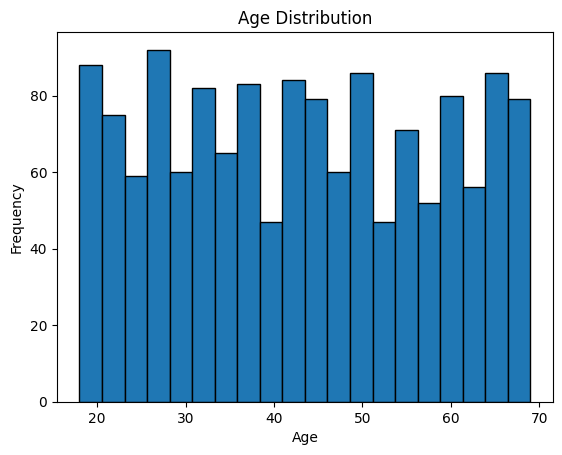

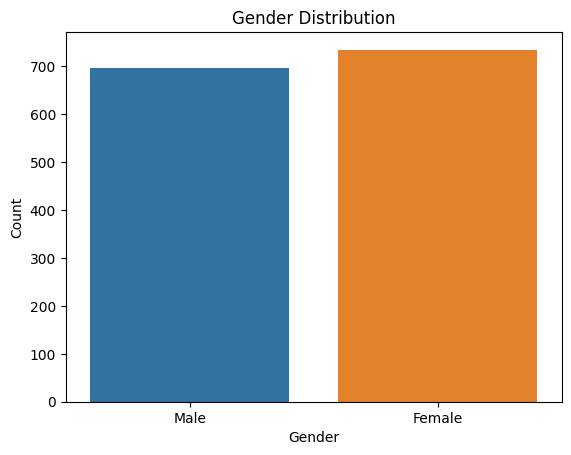

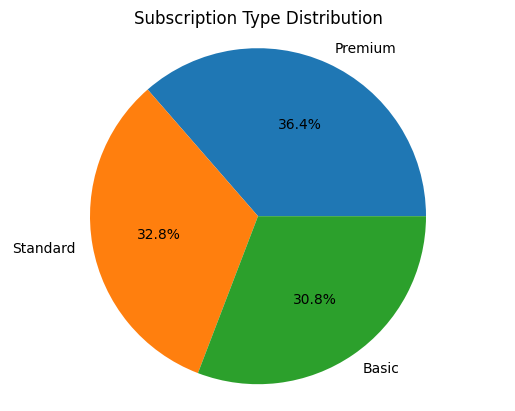

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.74      1.00      0.85       211
         Yes       0.00      0.00      0.00        76

    accuracy                           0.74       287
   macro avg       0.37      0.50      0.42       287
weighted avg       0.54      0.74      0.62       287

Best parameters found: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

          No       0.79      0.99      0.88       211
         Yes       0.88      0.28      0.42        76

    accuracy                           0.80       287
   macro avg       0.83      0.63      0.65       287
weighted avg       0.81      0.80      0.76       287



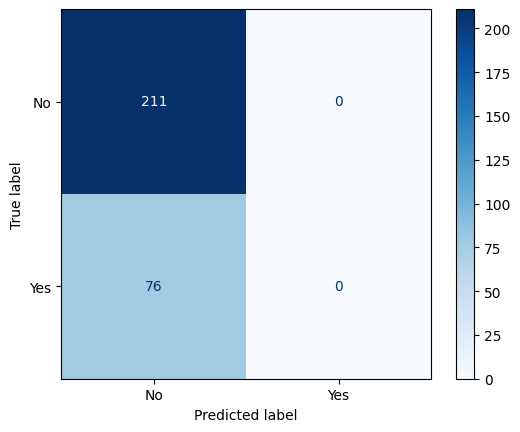

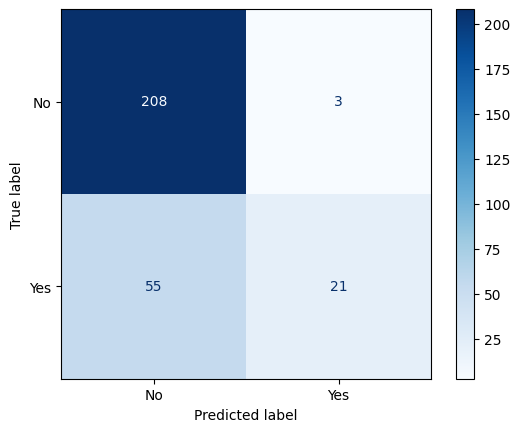

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Read CSV file into a Pandas DataFrame
arquivo_csv = '/content/streaming_data (1).csv'
df = pd.read_csv(arquivo_csv)

# Drop rows with missing values
df = df.dropna()

# Descriptive Statistics
descricao_estatistica = df.describe()
print(descricao_estatistica)

# Data Information
informacoes_dados = df.info()
print(informacoes_dados)

# Check missing values

valores_faltantes = df.isna().sum()
print(valores_faltantes)

# Histogram of Age distribution
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Count plot of Gender distribution
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# Pie chart of Subscription_type distribution
subscription_counts = df['Subscription_type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%')
plt.title('Subscription Type Distribution')
plt.axis('equal')
plt.show()

# Fill missing values with zero for specific columns
columns_to_fill_with_zero = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[columns_to_fill_with_zero] = df[columns_to_fill_with_zero].fillna(0)

# Drop rows with missing values for specific columns
columns_to_dropna = ['Gender', 'Subscription_type', 'Age']
df = df.dropna(subset=columns_to_dropna)

# Replace numerical labels with 'No' and 'Yes' for 'Churned' column
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

# Convert selected columns to integer type
columns_to_convert_to_int = ['Time_on_platform', 'Num_streaming_services', 'Devices_connected', 'Age']
df[columns_to_convert_to_int] = df[columns_to_convert_to_int].astype(int)

# Logistic Regression Model
X = df[['Age', 'Time_on_platform', 'Num_streaming_services', 'Devices_connected', 'Avg_rating']]
y = df['Churned']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix and Classification Report for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')

classification_rep = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(classification_rep)

# Random Forest Model with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Best hyperparameters found during grid search
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Model Evaluation - Random Forest
y_pred_rf = best_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No', 'Yes'])
disp_rf.plot(cmap='Blues')

classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=['No', 'Yes'])
print(classification_rep_rf)
